In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from generate_data import generate_data
from Modules import Sequential, Linear, ReLU, Tanh, Sigmoid
from training import train_model_SGD, accuracy

In [3]:
# Imports to plot
import numpy as np
import matplotlib.pyplot as plt

In [4]:
N = 1000 # Number of samples in each dataset

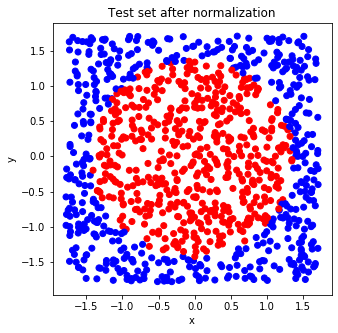

In [5]:
# Plot a test set after normalization

train_input, train_target, test_input, test_target = generate_data(1000, normalize=True)

x = test_input[:,0]
y = test_input[:,1]

colors = np.full(len(x), "r")
colors[test_target==1] = "b"

plt.figure(figsize=(5,5))
plt.scatter(x,y, c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test set after normalization")
plt.savefig('test_set.pdf',format='pdf')
plt.show()

In [9]:
# Train 10 models to compute the mean and the variance of the model
nb_rounds = 10
train_accuracies = np.zeros(nb_rounds)
test_accuracies = np.zeros(nb_rounds)
for i in range(0, nb_rounds):
    
    # Generate normalize training and testing dataset of size N = 1000
    N = 1000 # Number of samples in each dataset
    train_input, train_target, test_input, test_target = generate_data(N, normalize=True)

    # Builds a network with three hidden layer of size 25 using sequential Linear modules and activation functions
    l1 = Linear(2,25)
    a1 = ReLU()
    l2 = Linear(25, 25)
    a2 = Tanh()
    l3 = Linear(25, 25)
    a3 = Sigmoid()
    l4 = Linear(25, 2)
    model = Sequential(l1, a1, l2, a2, l3, a3, l4)

    # Train the model using MSE and logging the losses (verbose = True)
    losses = train_model_SGD(model, train_input, train_target, nb_epoch=300, learning_rate=1e-1, mini_batch_size=100, verbose=True)
    
    train_accuracies[i] = accuracy(model, train_input, train_target).item()
    test_accuracies[i] = accuracy(model, test_input, test_target).item()
    
train_mean, train_std = train_accuracies.mean(), train_accuracies.std()
test_mean, test_std = test_accuracies.mean(), test_accuracies.std()

Epoch: 0, Loss: 21.847204208374023, Accuracy: 0.756
Epoch: 5, Loss: 1.1747254133224487, Accuracy: 0.898
Epoch: 10, Loss: 0.8554347157478333, Accuracy: 0.917
Epoch: 15, Loss: 0.6917867660522461, Accuracy: 0.938
Epoch: 20, Loss: 0.5813561677932739, Accuracy: 0.969
Epoch: 25, Loss: 0.5005491971969604, Accuracy: 0.976
Epoch: 30, Loss: 0.4489715099334717, Accuracy: 0.977
Epoch: 35, Loss: 0.40370461344718933, Accuracy: 0.979
Epoch: 40, Loss: 0.38285261392593384, Accuracy: 0.979
Epoch: 45, Loss: 0.37728554010391235, Accuracy: 0.977
Epoch: 50, Loss: 0.35460418462753296, Accuracy: 0.982
Epoch: 55, Loss: 0.31877756118774414, Accuracy: 0.985
Epoch: 60, Loss: 0.3016498386859894, Accuracy: 0.984
Epoch: 65, Loss: 0.304878830909729, Accuracy: 0.986
Epoch: 70, Loss: 0.28451162576675415, Accuracy: 0.988
Epoch: 75, Loss: 0.271619588136673, Accuracy: 0.987
Epoch: 80, Loss: 0.27293381094932556, Accuracy: 0.988
Epoch: 85, Loss: 0.2635442614555359, Accuracy: 0.988
Epoch: 90, Loss: 0.2555128335952759, Accura

In [10]:
print(f"Train mean: {train_mean:.3f}")
print(f"Train std: {train_std:.3f}")
print(f"Test mean: {test_mean:.3f}")
print(f"Test std: {test_std:.3f}")

Train mean: 0.993
Train std: 0.003
Test mean: 0.980
Test std: 0.006


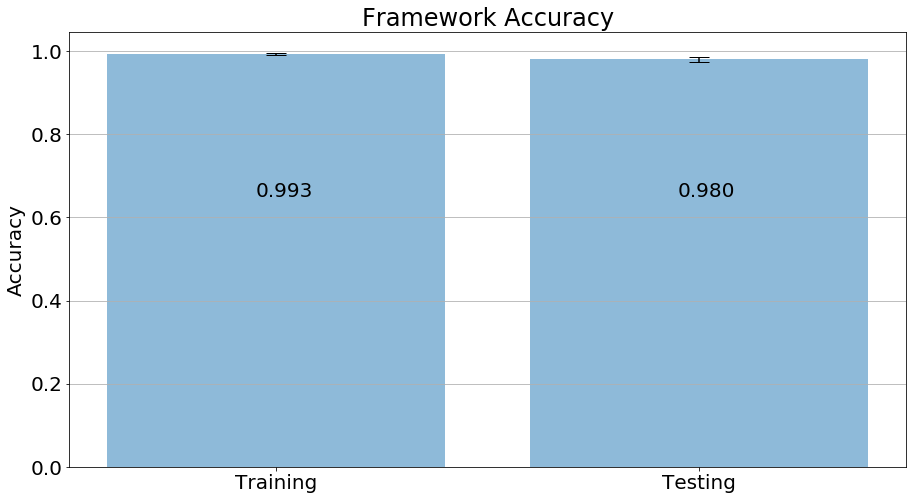

In [11]:
model_names = ['Training','Testing']
x_pos = np.arange(len(model_names))
means = [train_mean, test_mean]
stds = [train_std,  test_std]

# Build the plot
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names)
ax.set_title('Framework Accuracy')
ax.yaxis.grid(True)

for i, m in enumerate(means):
    ax.text(i-0.05, 0.65 , "{:0.3f}".format(m))

# Save the figure and show
plt.show()

fig.savefig('results.pdf',format='pdf',orientation='landscape')